<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/Dustin/EDA_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charlotte 311 Service Request Analysis

<h1> <b> Exploratory Data Analysis and Preprocessing </b> </h1>

## Data Import and Survey

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Function to read data from URL
def read_data_from_URL(url):
    df=pd.read_csv(url)
    return df

In [4]:
# Read in the data
serv_req_url='https://bitbucket.org/nthammad-uncc/test_repo/raw/7508681846896228bb87fd1989ec50ca2d592bc5/data/Service_Requests_311.csv'
requests = read_data_from_URL(serv_req_url)
requests.head()

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,INTERNAL_FIELD_OBSERVATION,TITLE,CMPD_DIVISION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,STREET_DIRECTION,STREET_NAME,STREET_TYPE,CITY,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID,Shape
0,1.458251e+06,508075.000119,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:25:00+00,N,NON_RECYCLABLE ITEMS,NaN,215.0,3601.0,NaN,KNAPDALE,LN,CHARLOTTE,NC,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089,NaN,{35439C7B-D8E4-4296-9119-8673B1D5A7C8},20904304,NaN
1,1.468687e+06,587225.999953,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,2016/11/07 14:28:00+00,N,UTILITY VERIFICATION LTR,NaN,265.0,4124.0,NaN,SILVERMERE,WY,CHARLOTTE,NC,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941,NaN,{3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2},02731251,NaN
2,1.471481e+06,562512.999839,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:34:00+00,N,Non-recyclable Items,NaN,103.0,523.0,NaN,GRAHAM MEADOW,DR,CHARLOTTE,NC,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094,NaN,{C3E4CF76-7630-4356-8216-428445A0903F},08917486,NaN
3,1.438992e+06,568604.000124,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,2016/11/07 14:41:00+00,N,MISSED RECYCLING,NaN,158.0,1801.0,NaN,CRANDON,DR,CHARLOTTE,NC,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327,NaN,{FC3B4CD8-1131-42B4-A37E-8CA448855B24},03925515,NaN
4,NaN,NaN,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,2016/11/07 14:44:00+00,N,CITIZEN FEEDBACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{E0166346-2381-40E1-80A0-2ECA4FB6CB27},NaN,NaN


In [ ]:
print("Records:", requests.shape[0])
print("Features:", requests.shape[1], "\n")
print(requests.info())

Records: 1631510
Features: 30 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   X                           1559084 non-null  float64
 1   Y                           1559084 non-null  float64
 2   OBJECTID                    1631510 non-null  int64  
 3   DEPARTMENT                  1631510 non-null  object 
 4   DIVISION                    1623095 non-null  object 
 5   REQUEST_NO                  1631510 non-null  int64  
 6   FISCAL_YEAR                 1631510 non-null  int64  
 7   FISCAL_MONTH                1631510 non-null  object 
 8   REQUEST_TYPE                1631510 non-null  object 
 9   RECEIVED_DATE               1631510 non-null  object 
 10  INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 11  TITLE                       1631510 non-null  object 
 12  CMPD_DIVISION           

## Initial Variable Selection


<b> The following variables will be dropped: </b>
<ol>
<li> X - redundant with X_COORD </li>
<li> Y - redundant with Y_COORD </li>
<li> FISCAL YEAR - redundant with RECEIVED_DATE </li>
<li> FISCAL MONTH - redundant with RECEIVED_DATE </li>
<li> TITLE - redundant with REQUEST_TYPE </li>
<li> CMPD_DIVISION - too many missing values </li>
<li> STREET_DIRECTION - redundant </li>
<li> STREET_NAME - redundant </li>
<li> STREET_TYPE - redundant </li>
<li> CITY - redundant </li>
<li> STATE - redundant </li>
<li> COUNCIL_DISTRICT - too many missing values </li>
<li> GLOBAL_ID - no predictive value </li>
<li> PID - no predictive value </li>
<li> SHAPE - all missing </li>
</ol>

In [5]:
requests.drop(requests.iloc[:, [0,1,4,6,7,11,12,15,16,17,18,19,26,27,28,29]], axis=1, inplace=True)
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   OBJECTID                    1631510 non-null  int64  
 1   DEPARTMENT                  1631510 non-null  object 
 2   REQUEST_NO                  1631510 non-null  int64  
 3   REQUEST_TYPE                1631510 non-null  object 
 4   RECEIVED_DATE               1631510 non-null  object 
 5   INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 6   NEIGHBORHOOD_PROFILE_AREA   1559062 non-null  float64
 7   BLOCK_NO                    1587157 non-null  float64
 8   ZIP_CODE                    1586427 non-null  float64
 9   FULL_ADDRESS                1624342 non-null  object 
 10  X_COORD                     1559084 non-null  float64
 11  Y_COORD                     1559084 non-null  float64
 12  LATITUDE                    1559077 non-null  float64
 1

## Survey Request Types and Departments

In [ ]:
print("Total unique request categories:", requests['REQUEST_TYPE'].unique().shape[0], "\n")
print("Top 30 categories by volume:\n")
print(requests['REQUEST_TYPE'].value_counts().head(30), "\n")

print("Top 30 departments by volume:\n")
print(requests['DEPARTMENT'].value_counts().head(30))

Total unique request categories: 165 

Top 30 categories by volume:

NON_RECYCLABLE ITEMS         831737
RECYCLABLE ITEMS             199452
HNS HEALTH AND SANITATION     85031
CART REPAIR-GARBAGE           36541
MISSED RECYCLING              27471
SW DOCUMENT GARBAGE           26729
311 DOCUMENT                  25395
CDOT STREETLIGHT REPAIR       19216
SW DOCUMENT RECYCLING         17932
DEAD ANIMAL COLLECTION        16727
CART ISSUE/MISSING CART       15121
TIRES                         13577
SW DOCUMENT YARD WASTE        13186
CART DELIVERY RECYCLING       11835
COMPLAINT                     11788
ZONING/COMPLAINT/ INSPECT     11767
CART(S) DEL- NEW BUILD        11324
CART ONLY DELIVER-GARB        11235
CART REPAIR-RECYCLE            9933
ZON GENERAL INFO  INQUIRY      9805
CDOT POTHOLE REPAIR            9416
HNS HOUSING                    8405
CART PURCHASE 2ND-GARBAGE      8077
MISSED GARBAGE                 7330
CDOT STREET SIGN REP/REPL      7260
PARKING ON LAWN WORKDAYS       

In [ ]:
print("Bottom 50 categories by volume:\n")
print(requests['REQUEST_TYPE'].value_counts().tail(50).sort_values(ascending=True))

Bottom 50 categories by volume:

SW FIELD OBSERVED TO CI        1
UT/MANDATORY                   1
DISABILITY ACT                 1
SWS MLTFMLY FIELD OBSERVE      1
BUS STOP-REMOVE TRASH CAN      1
SW EXCESSIVE STORM-SW USE      1
ON CALL - SWS SPEC SERV        1
COMPLEX PROBLEM                1
UT/LANDSCAPE                   1
SW REMINDER BULKY-SW USE       2
SW REMINDER GARB-SW USE        4
NEW SVC BUSINESS GARBAGE       5
CART REPAIR-BUSN GARB          6
SW ESCALATION REQUEST          6
BUS STOP-TRASH CAN MISC        6
OPINION                        7
CART DELIVERY BUSN GARB        7
LAND DEVELOPMENT INQUIRY       8
BUS FACILITIES MAINT           8
BULKY ITEM SCHEDULE            8
SMOKING VEHICLE REPORT         9
UT RATE CHANGE                 9
CART ONLY DELIVER-RECY        10
MUD IN THE STREET             10
BUS STOP-FULL TRASH  CAN      10
PARK & REC REFUND/CANCEL      11
DISABLED INSPECTION (SWS)     12
SWS CART RETIRE REVIEW        12
ZON APPEALS/CITATIONS INQ     14
CWP REQUES

### Display all 311 request types alphabetically

In [ ]:
# Set Display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Subset requests by unique values, sorted
A_CART = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[0:25].reset_index()
CDOT_COM = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[25:50].reset_index()
CON_INV = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[50:75].reset_index()
INV_PAR = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[75:100].reset_index()
PARK_SWDOC = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[100:125].reset_index()
SWESC_ZON = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[125:150].reset_index()
ZON_ZON = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[150:165].reset_index()

# Combine those 7 Series of 25 values each into 1 data frame for convenient side-by-side display 
categories = pd.concat([A_CART, CDOT_COM, CON_INV, INV_PAR, PARK_SWDOC, SWESC_ZON, ZON_ZON], axis=1)
categories.drop(categories.iloc[:,[0,2,4,6,8,10,12]], axis=1, inplace=True) # drop the index columns
categories.columns = ['A-CART', 'CDOT-COM', 'CON-INV', 'INV-PAR', 'PARK-SWDOC', 'SWESC-ZON', 'ZON-ZON']
categories.reset_index(drop=True)
categories = categories.style.set_properties(**{'text-align': 'left', 'font-size': '12px'}) # left justify for easy comparison of topics to determine possible bins / combinations
categories

,A-CART,CDOT-COM,CON-INV,INV-PAR,PARK-SWDOC,SWESC-ZON,ZON-ZON
0,3-1-1 ESCALATION REQUEST,CDOT BASKETBALL,CONTENT IMPROVEMENT PROG,INVESTIGATE/CONTACT GARB,PARKING ON LAWN OFFHOURS,SW ESCALATION REQUEST,ZON GENERAL INFO INQUIRY
1,311 DOCUMENT,CDOT CLEAN CATCH BASIN,COVID 19-PRICE GOUGING,INVESTIGATE/CONTACT RECY,PARKING ON LAWN WORKDAYS,SW EXCESSIVE STORM-SW USE,ZON HOLDS RELEASE REQUEST
2,ADOPT-A PICKUP SWS,CDOT FLOODING,COVID 19-PUBLIC GATHERING,INVESTIGATE/CONTACT YD WT,PLANNING INQUIRY,SW FIELD OBSERVED TO CI,ZON RESIDENTIAL PERMITS
3,ANIMAL FOUND REPORT,CDOT GRATE DAMAGE/REPLACE,COVID 19-STAY HOME VIOL,LAND DEVELOPMENT INQUIRY,POLLUTION,SW ONLY-DOOR HANGER LEFT,ZON SETBACKS
4,BLOCKAGE,CDOT GUARD RAIL,CURRENT DISABLED SERVICE,LANDSCAPE LIMBS,RECYCLABLE ITEMS,SW REMINDER BULKY-SW USE,ZON SIGNS INQUIRY
5,BOARDED UP STRUCTURE,CDOT MISCELLANEOUS,CWP REQUEST,LANDSCAPE TREES,REQUEST DISABILITY FORM,SW REMINDER GARB-SW USE,ZON STORAGE BLDG/ACC UNIT
6,BULKY ITEM SCHEDULE,CDOT NEW CROSSWALK,CWP REQUEST-HIGH PRIORITY,LITTER/DEBRIS IN STREET,REQUEST FOR SPEAKER,SW REMINDER RECY-SW USE,ZON SUBDIVIDE PROP/DUPLX
7,BUS FACILITIES MAINT,CDOT NEW SIDEWALK,DAMAGE/INVESTIGATE BULKY,MISSED BULKY ITEM,SIDEWALK OBSTR CONTAINERS,SW REMINDER YARD-SW USE,ZON SUPERVISORY COMPLAINT
8,BUS STOP-FULL TRASH CAN,CDOT NEW SIGN,DAMAGE/INVESTIGATE GARB,MISSED BUSINESS GARBAGE,SIDEWALK OBSTRUCT OTHER,SWAT-A-LITTERBUG,ZON VERIFICATION LETTERS
9,BUS STOP-REMOVE TRASH CAN,CDOT NEW STREETLIGHTS,DAMAGE/INVESTIGATE RECY,MISSED GARBAGE,SIGNS (NOT FOR 311 USE),SWS CART DATA LOAD,ZON WATERSHED/SWPE INQ


## Decisions on selection and binning:

- We will want to retain the option to use all categories and compare that to the performance of our analyses when using self-determined bins.

- Binning roughly around general categories--for example all CART-related requests into one category, cleanliness-related requests such as trash in the street and pollution into one category--we can encode a new column with only 40 categories.

- After binning, any categories with fewer than 30 records are dropped.

- We also eliminate several Solid Waste Services administrative categories, such as data loads, as well as three COVID-19-related categories, which we choose to exclude from this analysis.


In [ ]:
# Drop excluded request types as described above
types_to_drop = ["UT RATE CHANGE", "UT/LANDSCAPE", "UT/MANDATORY", "SWS CART DATA LOAD", "SWS CART RETIRE REVIEW", "SWS CART SHIPMT REVIEW", "SWS LIAISON", "SWS MLTFMLY FIELD OBSERVE", "SW EXCESSIVE STORM-SW USE", 
                 "SW FIELD OBSERVED TO CI", "SMOKING VEHICLE REPORT", "COVID 19-PRICE GOUGING", "COVID 19-PUBLIC GATHERING", "COVID 19-STAY HOME VIOL", "TELL TRANSIT CONCERN", "ON CALL - SWS SPEC SERV"]
start = requests.shape[0]
requests = requests[~requests['REQUEST_TYPE'].isin(types_to_drop)]
end = requests.shape[0]
print("{0:5d} requests were dropped.".format(start-end))

10051 requests were dropped.


In [ ]:
# Define request categories. Twenty-four types will simply be transferred as categories and not binned, making 40 total categories.
cats = {
    'Category Name':["ESCALATION REQUEST", "BULKY ITEM", "TRANSPORTATION", "CART", "CUSTOMER FEEDBACK", "DISABLED SERVICE", "CWP", "GARBAGE", "RECYCLING", "YARD WASTE", 
                     "DISABILITY ACT", "VIOLATIONS", "WEATHER AND ENVIRONMENTAL", "ADMINISTRATIVE ACTIONS", "CLEANLINESS", "MISSED SERVICE", "ZONING"],
        'Request Types':[["3-1-1 ESCALATION REQUEST",  "SW ESCALATION REQUEST"],
                        ["DAMAGE/INVESTIGATE BULKY",  "INVESTIGATE/CONTACT BULKY",  "SW DOCUMENT BULKY ITEMS",  "SW REMINDER BULKY-SW USE",  "BULKY ITEM SCHEDULE"],
                        ["BUS FACILITIES MAINT",  "BUS STOP-FULL TRASH  CAN",  "BUS STOP-REMOVE TRASH CAN",  "BUS STOP-TRASH CAN MISC",  "CDOT BASKETBALL",  
                         "CDOT CLEAN CATCH BASIN",  "CDOT FLOODING",  "CDOT GRATE DAMAGE/REPLACE",  "CDOT GUARD RAIL",  "CDOT MISCELLANEOUS",  "CDOT NEW CROSSWALK",  
                         "CDOT NEW SIDEWALK",  "CDOT NEW SIGN",  "CDOT NEW STREETLIGHTS",  "CDOT NEW TRAFFIC SIGNAL",  "CDOT POTHOLE REPAIR",  "CDOT RESURFACING ISSUES",  
                         "CDOT ROAD QUALITY",  "CDOT SIDEWALK REPAIR",  "CDOT SIGHT OBSTRUCTION",  "CDOT STREET SIGN REP/REPL",  "CDOT STREETLIGHT REPAIR",  
                         "CDOT TRAF SIGNAL REPAIR",  "CDOT TRAF SIGNAL TIMING",  "CDOT TRAFFIC CALMING", "NCDOT POTHOLE REQUEST",	"SIDEWALK OBSTR CONTAINERS",	
                         "SIDEWALK OBSTRUCT OTHER",	"SIGNS (NOT FOR 311 USE)",	"STREET MAINTENANCE - SNOW",	"STREET SWEEPING/FLUSHING"],
                        ["CART DELIVERY BUSN GARB",  "CART DELIVERY RECYCLING",  "CART ISSUE/MISSING CART",  "CART ONLY DELIVER-GARB",  "CART ONLY DELIVER-RECY",  
                         "CART PICKUP BUSN GARB",  "CART PICKUP- GARBAGE",  "CART PICKUP-RECYCLE",  "CART PURCHASE 2ND-GARBAGE",  "CART PURCHASE 2ND-RECYCLE",  
                         "CART REPAIR-BUSN GARB",  "CART REPAIR-GARBAGE",  "CART REPAIR-RECYCLE",  "CART(S) DEL-NEW BUILD"],
                        ["CITIZEN FEEDBACK",  "COMPLEX PROBLEM",  "COMPLIMENT/THANKS",  "INQUIRY",  "OPINION",  "STW GENERAL INQUIRY",  "SUGGESTION/IDEA",  
                         "MOBILE APP FEEDBACK",  "LAND DEVELOPMENT INQUIRY",  "PLANNING INQUIRY",  "TAX BILL INQUIRY"],
                        ["CURRENT DISABLED SERVICE",  "DISABLED INSPECTION (SWS)"],
                        ["CWP REQUEST",  "CWP REQUEST-HIGH PRIORITY"],
                        ["DAMAGE/INVESTIGATE GARB",  "SW DOCUMENT GARBAGE",  "INVESTIGATE/CONTACT GARB",  "SW REMINDER GARB-SW USE"],
                        ["DAMAGE/INVESTIGATE RECY",  "SW DOCUMENT RECYCLING",  "INVESTIGATE/CONTACT RECY",  "SW REMINDER RECY-SW USE"],
                        ["DAMAGE/INVESTIGATE YRD WS",  "SW DOCUMENT YARD WASTE",  "INVESTIGATE/CONTACT YD WT",  "SW REMINDER YARD-SW USE"],
                        ["DISABILITY ACT",  "DISABILITY CANCEL/ CHANGE", "REQUEST DISABILITY FORM"],
                        ["DUMPING IN STREET/ROW",  "GRAFFITI",  "PARKING ON LAWN OFFHOURS",  "PARKING ON LAWN WORKDAYS",  "SWAT-A-LITTERBUG"],
                        ["EROSION",  "FLOODING",  "LANDSCAPE LIMBS",  "LANDSCAPE TREES"],
                        ["NEW SERVICE/CHNG MLTIPLX",  "NEW SVC BUSINESS GARBAGE",  "NON-RESIDEN BUILDING CODE",  "MULTIPLEX REVIEW",  
                         "PARK & REC REFUND/CANCEL",  "INVALID/NEW SW ADDRESS"],
                        ["SPILLED BULKY ITEMS",  "SPILLED GARBAGE",  "SPILLED RECYCLING",  "SPILLED YARD WASTE",  "MUD IN STREET-CONSTRUCTIO",  
                         "MUD IN THE STREET",  "LITTER/DEBRIS IN STREET",  "POLLUTION"],
                        ["MISSED BULKY ITEM",  "MISSED BUSINESS GARBAGE",  "MISSED GARBAGE",  "MISSED RECYCLING",  "MISSED YARD WASTE"],
                        ["ZON ABC PERMITS INQUIRY",  "ZON APPEALS/CITATIONS INQ",  "ZON DAYCARE/CHILDCARE INQ",  "ZON FENCE/OPEN SPACE INQ",  
                         "ZON HOLDS RELEASE REQUEST",  "ZON RESIDENTIAL PERMITS",  "ZON SETBACKS",  "ZON SIGNS INQUIRY",  "ZON STORAGE BLDG/ACC UNIT",  
                         "ZON SUBDIVIDE PROP/DUPLX",  "ZON SUPERVISORY COMPLAINT",  "ZON VERIFICATION LETTERS",  "ZON WATERSHED/SWPE INQ",  "ZONGROUP/BOARDING HOMES",  
                         "ZONHOME BUSINESS/APPROVAL",  "ZONMOBILE FOOD/TENT SALES",  "ZONSETBACKS/STORAGE BUILD"]]
        }
cats = pd.DataFrame(cats)
cats

,Category Name,Request Types
0,ESCALATION REQUEST,"[3-1-1 ESCALATION REQUEST, SW ESCALATION REQUEST]"
1,BULKY ITEM,"[DAMAGE/INVESTIGATE BULKY, INVESTIGATE/CONTACT..."
2,TRANSPORTATION,"[BUS FACILITIES MAINT, BUS STOP-FULL TRASH CA..."
3,CART,"[CART DELIVERY BUSN GARB, CART DELIVERY RECYCL..."
4,CUSTOMER FEEDBACK,"[CITIZEN FEEDBACK, COMPLEX PROBLEM, COMPLIMENT..."
5,DISABLED SERVICE,"[CURRENT DISABLED SERVICE, DISABLED INSPECTION..."
6,CWP,"[CWP REQUEST, CWP REQUEST-HIGH PRIORITY]"
7,GARBAGE,"[DAMAGE/INVESTIGATE GARB, SW DOCUMENT GARBAGE,..."
8,RECYCLING,"[DAMAGE/INVESTIGATE RECY, SW DOCUMENT RECYCLIN..."
9,YARD WASTE,"[DAMAGE/INVESTIGATE YRD WS, SW DOCUMENT YARD W..."


In [ ]:
# Default the value to the request type
requests['REQUEST_CAT'] = requests['REQUEST_TYPE'] 

# Encode new column by binning the categories
for cat in range(len(cats)) :
    label = cats.iloc[cat][0]
    requests.loc[requests['REQUEST_TYPE'].isin(cats.iloc[cat][1]), 'REQUEST_CAT'] = label

# Reorder the columns
requests = requests.iloc[:,[0,1,2,3,4,5,16,6,7,8,9,10,11,12,13,14,15]]

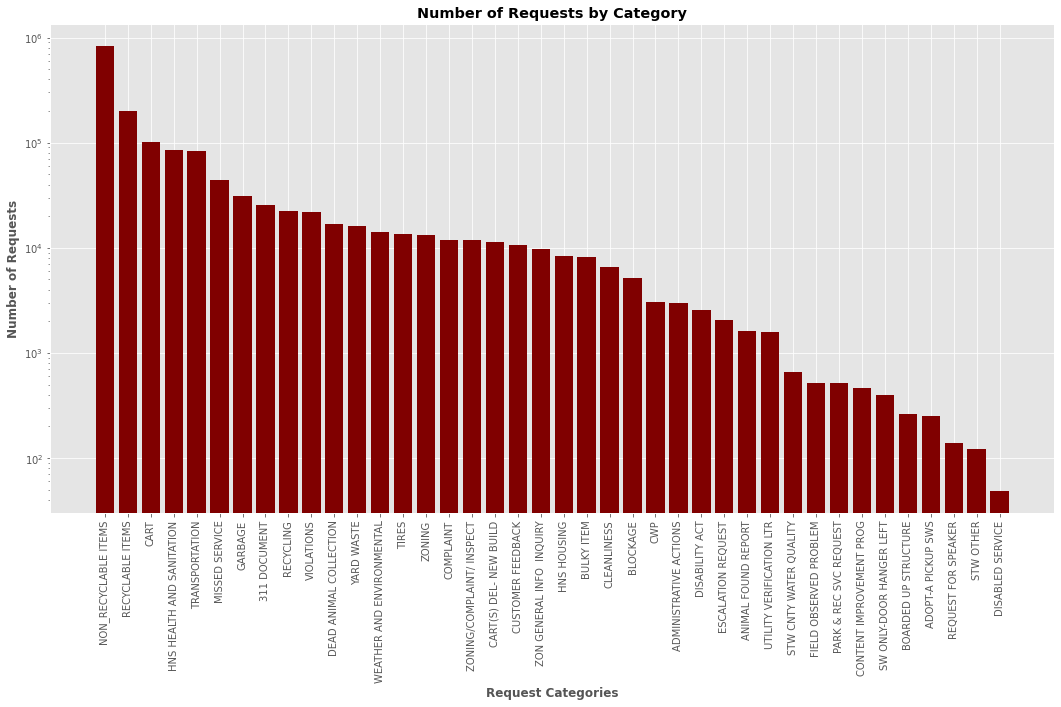

In [ ]:
request_cats = requests[['REQUEST_CAT']].value_counts()
cat_names = request_cats.to_frame().reset_index()
cat_names.columns = ['Category', 'Count']

plt.figure(figsize=(18,9))
x_pos = [i for i, _ in enumerate(request_cats)]
x = range(len(request_cats))
y = request_cats
plt.bar(x, y, color='maroon')
plt.yscale('log')
plt.xlabel("Request Categories", fontweight='bold')
plt.ylabel("Number of Requests", fontweight='bold')
plt.title("Number of Requests by Category", fontweight='bold')

plt.xticks(x_pos, cat_names.iloc[:,0], rotation=90)

plt.show()

In [ ]:
# Set sorting order for REQUEST_CAT to match highest volume to lowest volume for the whole data set
cat_order = ["NON_RECYCLABLE ITEMS", "RECYCLABLE ITEMS", "CART", "HNS HEALTH AND SANITATION", "TRANSPORTATION", "MISSED SERVICE", "GARBAGE", 
             "311 DOCUMENT", "RECYCLING", "VIOLATIONS", "DEAD ANIMAL COLLECTION", "YARD WASTE", "WEATHER AND ENVIRONMENTAL", "TIRES", "ZONING", 
             "COMPLAINT", "ZONING/COMPLAINT/ INSPECT", "CART(S) DEL- NEW BUILD", "CUSTOMER FEEDBACK", "ZON GENERAL INFO  INQUIRY", "HNS HOUSING", 
             "BULKY ITEM", "CLEANLINESS", "BLOCKAGE", "CWP", "ADMINISTRATIVE ACTIONS", "DISABILITY ACT", "ESCALATION REQUEST", "ANIMAL FOUND REPORT", 
             "UTILITY VERIFICATION LTR", "STW CNTY WATER QUALITY", "FIELD OBSERVED PROBLEM", "PARK & REC SVC REQUEST", "CONTENT IMPROVEMENT PROG", 
             "SW ONLY-DOOR HANGER LEFT", "BOARDED UP STRUCTURE", "ADOPT-A PICKUP SWS", "REQUEST FOR SPEAKER", "STW OTHER", "DISABLED SERVICE"]
requests['REQUEST_CAT'] = pd.Categorical(requests['REQUEST_CAT'], cat_order)

# Divide categories by season of the year
requests['RECEIVED_DATE'] = pd.to_datetime(requests['RECEIVED_DATE'], format='%Y/%m/%d %H:%M')
requests['SEASON'] = requests['RECEIVED_DATE'].dt.quarter

request_cats_winter = requests['SEASON'].eq(1).groupby(requests['REQUEST_CAT']).sum()
request_cats_spring = requests['SEASON'].eq(2).groupby(requests['REQUEST_CAT']).sum()
request_cats_summer = requests['SEASON'].eq(3).groupby(requests['REQUEST_CAT']).sum()
request_cats_fall = requests['SEASON'].eq(4).groupby(requests['REQUEST_CAT']).sum()

In [ ]:
print(y1+y2+y3+y4)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


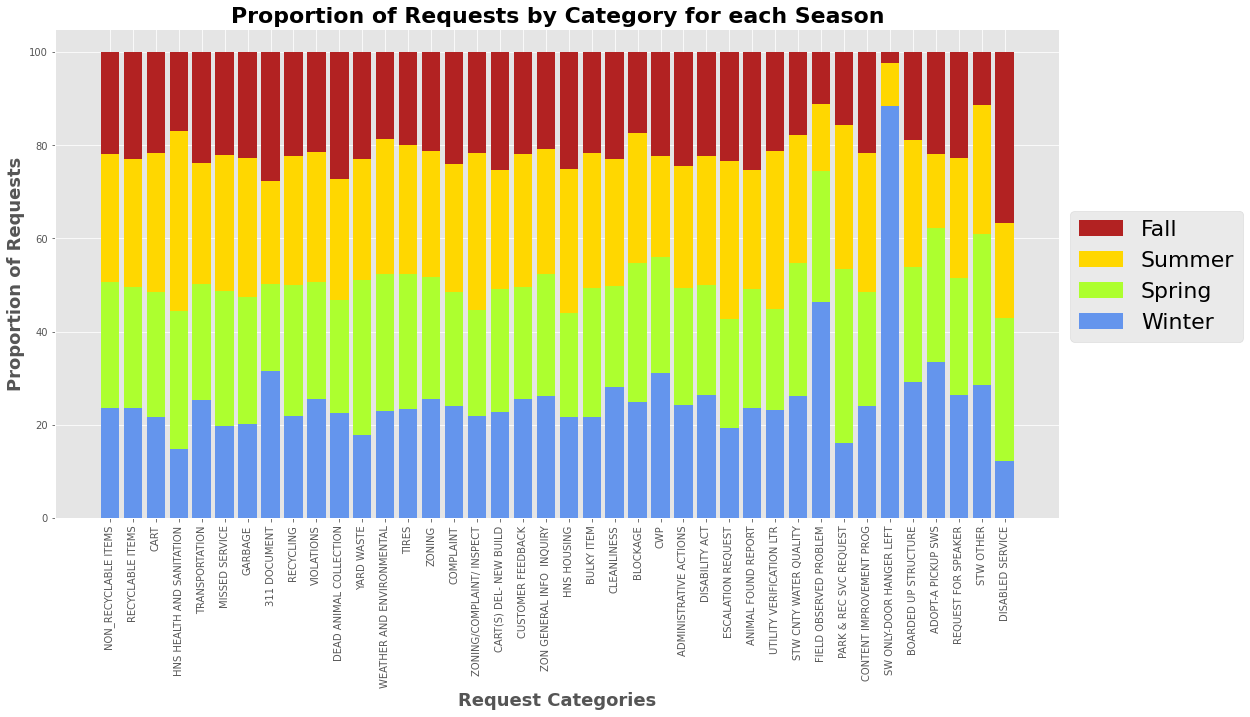

In [ ]:
# Plot proportion of requests by category for each season
plt.figure(figsize=(18,9))
x_pos = [i for i, _ in enumerate(request_cats)]
x = range(len(request_cats))
y1 = request_cats_winter.to_numpy()/request_cats.to_numpy() * 100
y2 = request_cats_spring.to_numpy()/request_cats.to_numpy() * 100
y3 = request_cats_summer.to_numpy()/request_cats.to_numpy() * 100
y4 = request_cats_fall.to_numpy()/request_cats.to_numpy() * 100

plt.bar(x, y1, color='cornflowerblue', label='Winter')
plt.bar(x, y2, color='greenyellow', label='Spring', bottom=y1)
plt.bar(x, y3, color='gold', label='Summer', bottom=y1+y2)
plt.bar(x, y4, color='firebrick', label='Fall', bottom=y1+y2+y3)

plt.xlabel("Request Categories", fontweight='bold', fontsize=18)
plt.ylabel("Proportion of Requests", fontweight='bold', fontsize=18)
plt.title("Proportion of Requests by Category for each Season", fontweight='bold', fontsize=22)
plt.xticks(x_pos, cat_names.iloc[:,0], rotation=90)

plt.legend(handles=reversed(plt.legend().legendHandles), labels=['Fall','Summer','Spring','Winter'],
           loc='upper left', bbox_to_anchor=(1, 0.65), fontsize=22)
plt.show()

## Customers with the highest number of requests

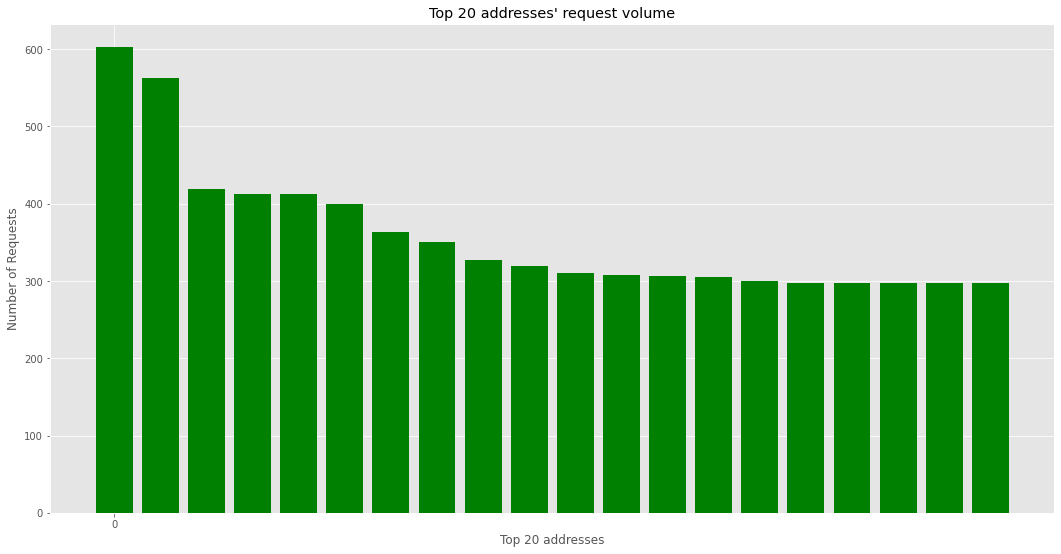

In [ ]:
# Using address as "customer"
address_ranks = requests['FULL_ADDRESS'].value_counts().head(20)

plt.figure(figsize=(18,9))
x_pos = [i for i, _ in enumerate(address_ranks[[0]])]
x = range(20)
y = address_ranks
plt.bar(x, y, color='green')
plt.xlabel("Top 20 addresses")
plt.ylabel("Number of Requests")
plt.title("Top 20 addresses' request volume")

plt.xticks(x_pos, x)

plt.show()

In [ ]:
# Combining LATTITUDE and LONGITUDE to create unique location IDs accurate to 1.11m to define as "customer"
requests['LATLON'] = requests["LATITUDE"].astype(str) + requests["LONGITUDE"].astype(str)
# Rank customers by frequency of requests
customer_ranks = requests['LATLON'].value_counts().to_frame().reset_index()
customer_ranks.columns = ['LATLON', 'Number of Calls'] # change column names
top_20 = customer_ranks[0:20]
top_20

,LATLON,Number of Calls
0,nannan,71336
1,35.26671306-80.76104322,748
2,35.12039601-80.86962228,563
3,35.23909427-80.92592474,356
4,35.25927032-80.90078488,344
5,35.26391476-80.73330321,320
6,35.26371343-80.88607182,320
7,35.14960744-80.88478039,312
8,35.22968575-80.74488978,308
9,35.19929285-80.76009595,306


## Frequency of Requests Over Time

In [ ]:
requests['RECEIVED_DATE'].head()

0    2016/11/07 14:25:00+00
1    2016/11/07 14:28:00+00
2    2016/11/07 14:34:00+00
3    2016/11/07 14:41:00+00
4    2016/11/07 14:44:00+00
Name: RECEIVED_DATE, dtype: object

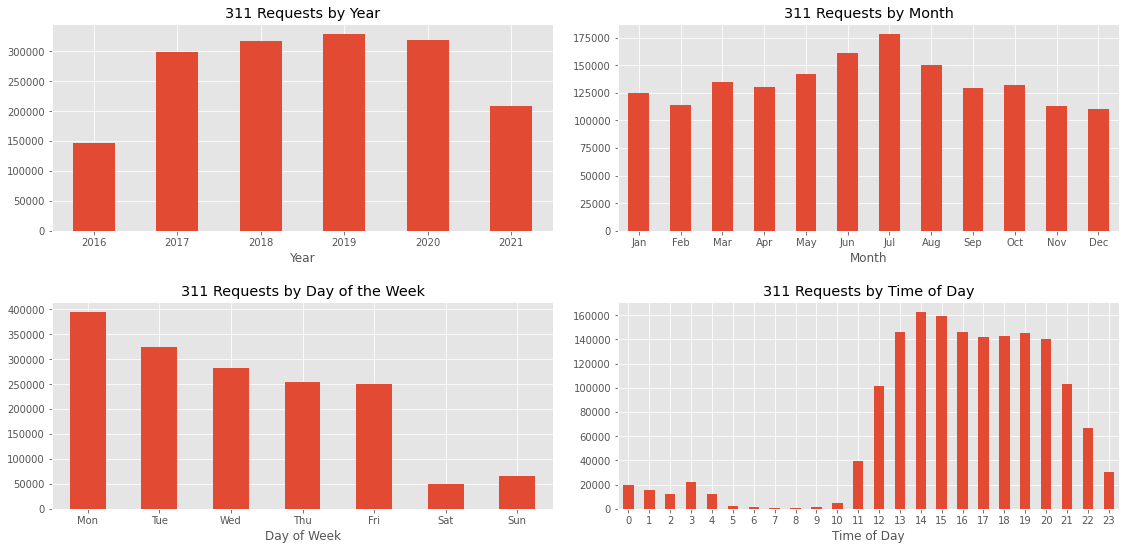

In [ ]:
# 311 Service requests plotted over various time scales
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
requests.groupby(requests['RECEIVED_DATE'].rename('Year').dt.year).size().plot.bar()
plt.title("311 Requests by Year")
plt.xticks(ticks=range(6), rotation=0)
plt.subplot(2,2,2)
requests.groupby(requests['RECEIVED_DATE'].rename('Month').dt.month).size().plot.bar()
plt.title("311 Requests by Month")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.subplot(2,2,3)
requests.groupby(requests['RECEIVED_DATE'].rename('Day of Week').dt.dayofweek).size().plot.bar()
plt.title("311 Requests by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.subplot(2,2,4)
requests.groupby(requests['RECEIVED_DATE'].rename('Time of Day').dt.hour).size().plot.bar()
plt.title("311 Requests by Time of Day")
plt.xticks(ticks=range(24), rotation=0)
plt.tight_layout(pad=2.0)

<h2> Data Preprocessing </h2>

<h2> Data Understanding and Exploration </h2>

<h2> Data Preparation for Modeling </h2>

<h2> Modeling </h2>

<h2> Evaluation </h2>

<h2> Results </h2>